In [106]:
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt
from sklearn.datasets import fetch_openml
from sklearn import metrics, svm, preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize

In [107]:
mnist = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)
fmnist = fetch_openml("Fashion-MNIST", data_home="./fmnist", cache=True)



In [108]:
def count_results(y_test, y_predicted, y_predicted_proba):
    try:
        print('Accuracy score:')
        print(metrics.accuracy_score(y_test, y_predicted))
        print('Zero one loss score:')
        print(metrics.zero_one_loss(y_test, y_predicted))
        print('F1 score:')
        print(metrics.f1_score(y_test, y_predicted, average = None))
        print(skplt.metrics.plot_precision_recall(y_test, y_predicted_proba))
        print(skplt.metrics.plot_roc(y_test, y_predicted_proba))
        plt.rcParams['figure.figsize'] = [20, 10]
        plt.rcParams['font.size'] = 5
        plt.show()
        print('Hinge loss score:')
        print(metrics.hinge_loss(y_test, y_predicted_proba))
    except:
        pass

In [ ]:
test_sizes = [0.1, 0.2, 0.25, 0.375, 0.5, 0.625, 0.75]
epochs = [500, 1000, 2500, -1]


partmnist_data = mnist.data[0:35000]
partmnist_target = mnist.target[0:35000]

x_mnist, y_mnist = partmnist_data, partmnist_target

for epoch in epochs:
    for test_size in test_sizes:
        print('--------------------------------------------------------')
        print('Rozmiar testowy ' + str(test_size))
        print('Rozmiar treningowy ' + str(1 - test_size))
        if epoch == -1:
            print('Epochs not limited')
        else:
            print('Epochs ' + str(epoch))
        x_train, x_test, y_train, y_test = train_test_split(x_mnist, y_mnist, test_size=test_size)

        scaler = StandardScaler().fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        x_mnist = scaler.transform(x_mnist)

        if epoch == -1:
            linear_svc = OneVsRestClassifier(svm.SVC(kernel="linear", probability=True)).fit(x_train, y_train)
        else:
            linear_svc = OneVsRestClassifier(svm.SVC(kernel="linear", probability=True, max_iter=epoch)).fit(x_train, y_train)

        y_predicted = linear_svc.predict(x_test)
        y_predicted_proba = linear_svc.predict_proba(x_test)
    
        count_results(y_test, y_predicted, y_predicted_proba)

--------------------------------------------------------
Rozmiar testowy 0.1
Rozmiar treningowy 0.9
Epochs 500


C:\Users\Michael\anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\Michael\anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\svm\_base.py:249: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[0.94736842 0.94352159 0.83530678 0.83902439 0.874      0.82943925
 0.92107892 0.89420423 0.81104972 0.84577114]
AxesSubplot(0.125,0.125;0.775x0.755)


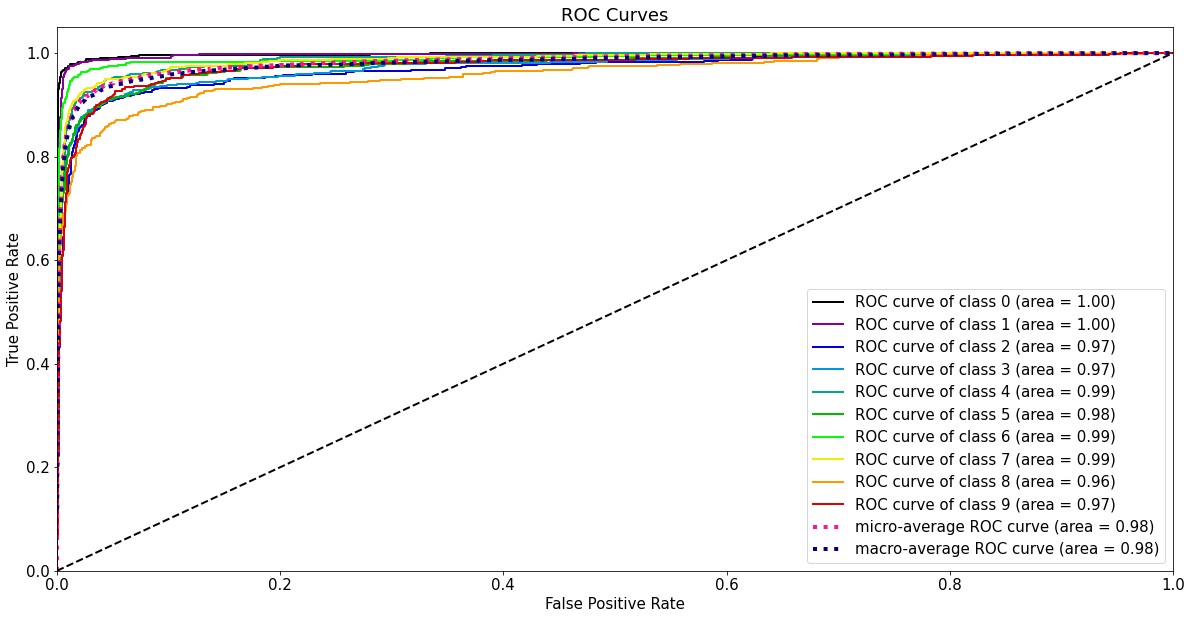

AxesSubplot(0.125,0.125;0.775x0.755)


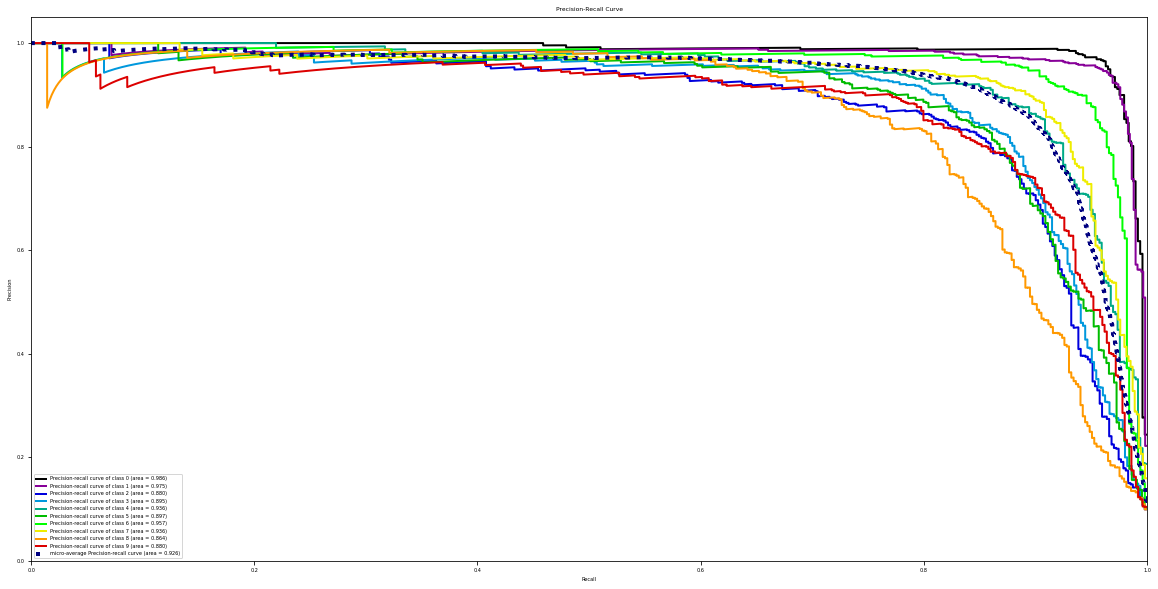